<a href="https://colab.research.google.com/github/SimranShaikh20/ML-Assignment/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 – Clustering with Iris Dataset

We will use the Iris dataset and perform clustering using **petal length** and **petal width** features only.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## 3.1 Load Iris dataset and select petal features

The dataset has 4 features: sepal length, sepal width, petal length, and petal width.  
For simplicity, we will only use **petal length** and **petal width**.


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:4]  # select petal length and petal width

print("Shape of dataset:", X.shape)
print("First 5 rows:\n", X[:5])


Shape of dataset: (150, 2)
First 5 rows:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


## 3.2 Preprocessing (Scaling)

KMeans uses Euclidean distance, so scaling helps when features have different ranges.  
- Petal length: ~1–7 cm  
- Petal width: ~0.1–2.5 cm  

We apply **StandardScaler** to normalize both features.


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows before scaling:\n", X[:5])
print("\nFirst 5 rows after scaling:\n", X_scaled[:5])


First 5 rows before scaling:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

First 5 rows after scaling:
 [[-1.34022653 -1.3154443 ]
 [-1.34022653 -1.3154443 ]
 [-1.39706395 -1.3154443 ]
 [-1.2833891  -1.3154443 ]
 [-1.34022653 -1.3154443 ]]


## 3.3 Elbow Method

The **Elbow Method** helps us find the optimal value of `k` by plotting  
the Within-Cluster-Sum-of-Squares (WCSS) for different values of `k`.  

We look for the "elbow point" in the curve.


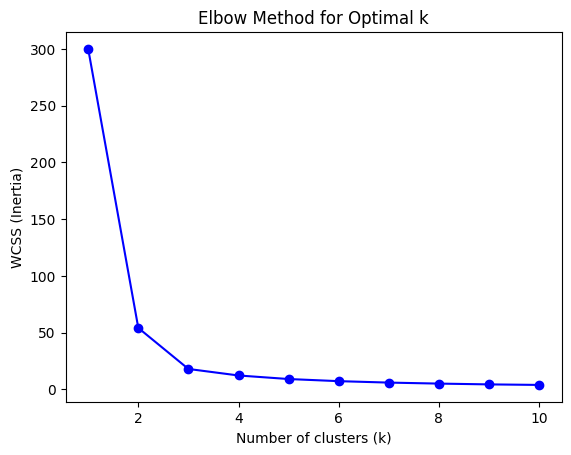

In [ ]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


## 3.4 Clustering with Optimal k

From the elbow plot, the optimal value of `k` is **3**.  
We now perform KMeans clustering with `k=3` and visualize the clusters.


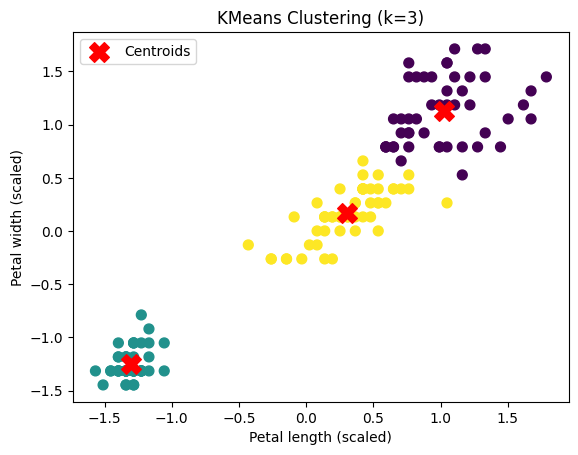

In [ ]:
# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('KMeans Clustering (k=3)')
plt.legend()
plt.show()
